In [ ]:
import keras

In [ ]:
pip install twilio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.4 MB 33.6 MB/s 


In [ ]:
from matplotlib import pyplot as plt
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_datagen=ImageDataGenerator(rescale=1./255,shear_range=0.2,rotation_range=180,zoom_range=0.2,horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale=1./255,shear_range=0.2,rotation_range=180,zoom_range=0.2,horizontal_flip=True)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
x_train=train_datagen.flow_from_directory('/content/drive/MyDrive/Dataset/Dataset/train_set',target_size=(64,64),batch_size=32,class_mode='binary')


Found 436 images belonging to 2 classes.


In [ ]:
x_test=test_datagen.flow_from_directory('/content/drive/MyDrive/Dataset/Dataset/test_set',target_size=(64,64),batch_size=32,class_mode='binary')



Found 121 images belonging to 2 classes.


In [ ]:
#to define the linear Initialisation import sequential
from keras.models import Sequential
#to add layers import Dense
from keras.layers import Dense
#to create Convolutional kernel import convolution2D
from keras.layers import Convolution2D
#import Maxpooling layer 
from keras.layers import MaxPooling2D
#import flatten layer
from keras.layers import Flatten
import warnings
warnings.filterwarnings('ignore')

In [ ]:
model = Sequential()

In [ ]:
model.add(Convolution2D(32,(3,3),input_shape=(64,64,3),activation='relu'))
#add maxpooling layers
model.add(MaxPooling2D(pool_size=(2,2)))
#add faltten layer
model.add(Flatten())


In [ ]:
#add hidden layers
model.add(Dense(150,activation='relu'))
#add output layer
model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.compile(loss='binary_crossentropy',optimizer="adam",metrics=["accuracy"])

In [ ]:
model.fit_generator(x_train,steps_per_epoch=14,epochs=10,validation_data=x_test,validation_steps=4)


Epoch 1/10
14/14 [==============================] - 89s 7s/step - loss: 1.2534 - accuracy: 0.6514 - val_loss: 0.2780 - val_accuracy: 0.9174
Epoch 2/10
14/14 [==============================] - 20s 1s/step - loss: 0.3901 - accuracy: 0.8211 - val_loss: 0.2153 - val_accuracy: 0.9008
Epoch 3/10
14/14 [==============================] - 22s 2s/step - loss: 0.3298 - accuracy: 0.8440 - val_loss: 0.1494 - val_accuracy: 0.9587
Epoch 4/10
14/14 [==============================] - 21s 2s/step - loss: 0.2101 - accuracy: 0.9128 - val_loss: 0.1176 - val_accuracy: 0.9752
Epoch 5/10
14/14 [==============================] - 24s 2s/step - loss: 0.2049 - accuracy: 0.9174 - val_loss: 0.1025 - val_accuracy: 0.9752
Epoch 6/10
14/14 [==============================] - 21s 2s/step - loss: 0.1821 - accuracy: 0.9243 - val_loss: 0.0911 - val_accuracy: 0.9835
Epoch 7/10
14/14 [==============================] - 22s 2s/step - loss: 0.1910 - accuracy: 0.9083 - val_loss: 0.1055 - val_accuracy: 0.9587
Epoch 8/10
14/14 [==

In [ ]:
model.save("forest1.h5")

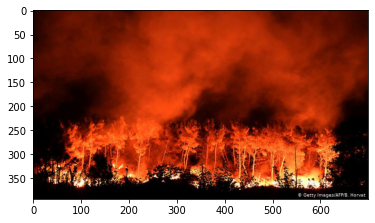

In [ ]:
#import load model from keras.model
from keras.models import load_model
#import image from keras
from tensorflow.keras.preprocessing import image
import numpy as np
#import cv2
import cv2
#load the saved model
model=load_model("/content/drive/MyDrive/forest1.h5")
img=image.load_img('/content/drive/MyDrive/Dataset/Dataset/test_set/with fire/19464620_401.jpg')
plt.imshow(img)
plt.show()
x=image.img_to_array(img)
res=cv2.resize(x,dsize=(64,64),interpolation=cv2.INTER_CUBIC)
#expand the image shape
x=np.expand_dims(res,axis=0)

In [ ]:
pred=model.predict(x)
pred = int(pred[0][0])
pred
int(pred)


1/1 [==============================] - 0s 64ms/step


1

In [ ]:
if pred==0:
  print('NO Forest fire')
  
elif pred==1:
  print('Forest fire')
  from twilio.rest import Client
  print('Forest fire')
  account_sid='AC1c8367297b343f081f5856d04192b536'
  auth_token='65ab4b3bf1ad571f54629cac0afb53e3'
  client=Client(account_sid,auth_token)
  message=client.messages \
  .create(
      body='forest fire is detected,stay alert',
      #use twilio free number
      from_='+18585441956',
      #to number
      to='+917708831537')
  print(message.sid)
  print("Fire detected")
  print("SMS Sent!")

Forest fire
Forest fire
SM32cf8a9f673c265ae372e7afd745c2f4
Fire detected
SMS Sent!
